In [6]:
!unzip /content/images.zip

Archive:  /content/images.zip
   creating: images/
   creating: images/Apple/
  inflating: images/Apple/Apple_0.jpg  
  inflating: images/Apple/Apple_11.jpg  
  inflating: images/Apple/Apple_13.jpg  
  inflating: images/Apple/Apple_15.jpg  
  inflating: images/Apple/Apple_16.jpg  
  inflating: images/Apple/Apple_17.jpg  
  inflating: images/Apple/Apple_19.jpg  
  inflating: images/Apple/Apple_2.jpg  
  inflating: images/Apple/Apple_21.jpg  
  inflating: images/Apple/Apple_23.jpg  
  inflating: images/Apple/Apple_24.jpg  
  inflating: images/Apple/Apple_25.jpg  
  inflating: images/Apple/Apple_26.jpg  
  inflating: images/Apple/Apple_27.jpg  
  inflating: images/Apple/Apple_28.jpg  
  inflating: images/Apple/Apple_3.jpg  
  inflating: images/Apple/Apple_30.jpg  
  inflating: images/Apple/Apple_32.jpg  
  inflating: images/Apple/Apple_33.jpg  
  inflating: images/Apple/Apple_34.jpg  
  inflating: images/Apple/Apple_36.jpg  
  inflating: images/Apple/Apple_37.jpg  
  inflating: images/App

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import numpy as np
from PIL import Image

In [8]:
image_dir = '/content/images'

## Getting image size data

In [9]:
def image_size_analysis(image_directory):

    class_image_sizes = {}
    for class_name in os.listdir(image_directory):
        class_dir = os.path.join(image_directory, class_name)
        if os.path.isdir(class_dir):
            image_sizes = []
            for filename in os.listdir(class_dir):
                if filename.endswith(('.jpg', '.jpeg', '.png')):  # Add more extensions if needed
                    image_path = os.path.join(class_dir, filename)
                    try:
                        img = Image.open(image_path)
                        image_sizes.append(img.size)
                    except (IOError, OSError) as e:
                        print(f"Error opening image {image_path}: {e}")
            class_image_sizes[class_name] = image_sizes
    return class_image_sizes

In [10]:
image_size_data = image_size_analysis(image_dir)

Error opening image /content/images/Bird/Bird_28.jpg: cannot identify image file '/content/images/Bird/Bird_28.jpg'
Error opening image /content/images/Bird/Bird_12.jpg: cannot identify image file '/content/images/Bird/Bird_12.jpg'
Error opening image /content/images/Bird/Bird_8.jpg: cannot identify image file '/content/images/Bird/Bird_8.jpg'
Error opening image /content/images/Bird/Bird_22.jpg: cannot identify image file '/content/images/Bird/Bird_22.jpg'
Error opening image /content/images/Bird/Bird_21.jpg: cannot identify image file '/content/images/Bird/Bird_21.jpg'
Error opening image /content/images/Bird/Bird_30.jpg: cannot identify image file '/content/images/Bird/Bird_30.jpg'
Error opening image /content/images/Bird/Bird_16.jpg: cannot identify image file '/content/images/Bird/Bird_16.jpg'
Error opening image /content/images/Bird/Bird_46.jpg: cannot identify image file '/content/images/Bird/Bird_46.jpg'


## Some images may be corrupted

## Some images in respective classes


Class: Bird


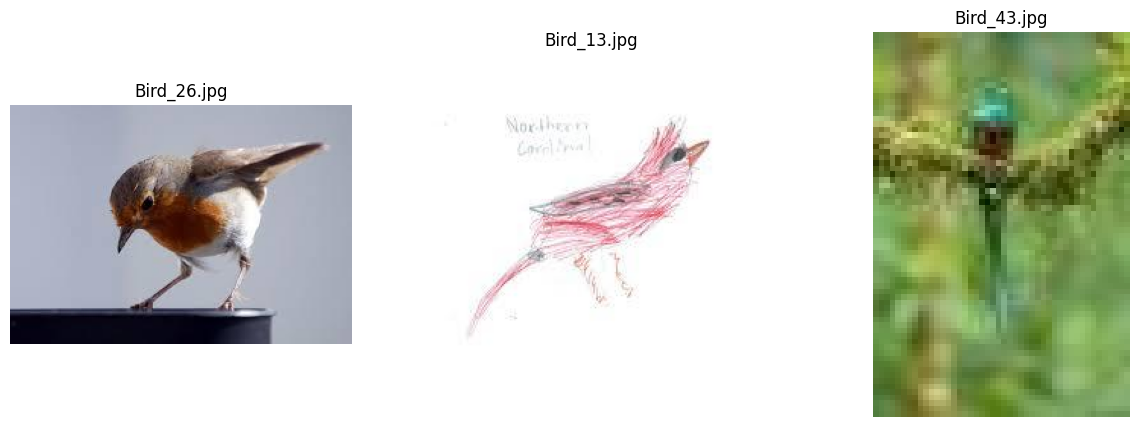


Class: Musical_Instruments


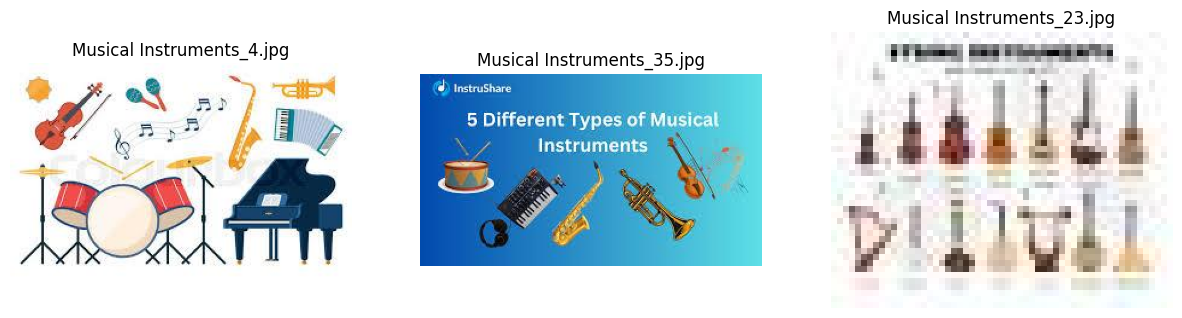


Class: Book


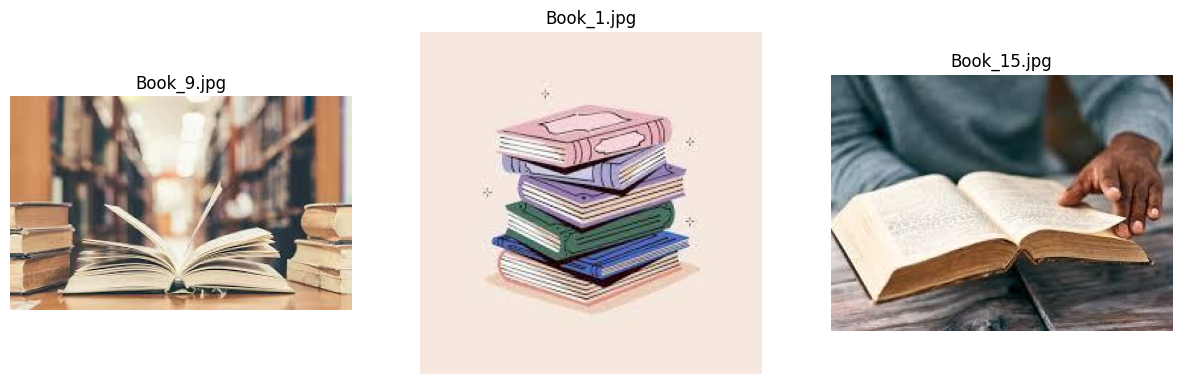


Class: Fruit


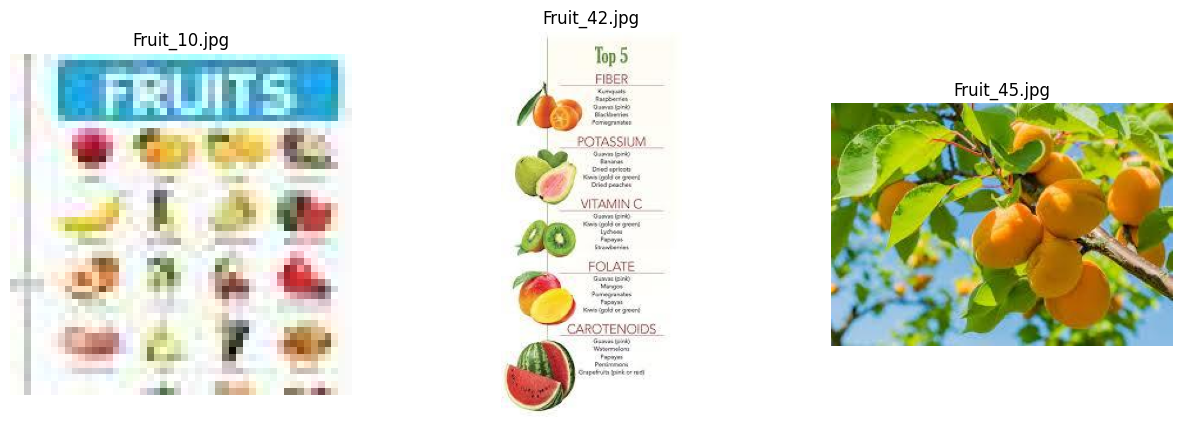


Class: Sports


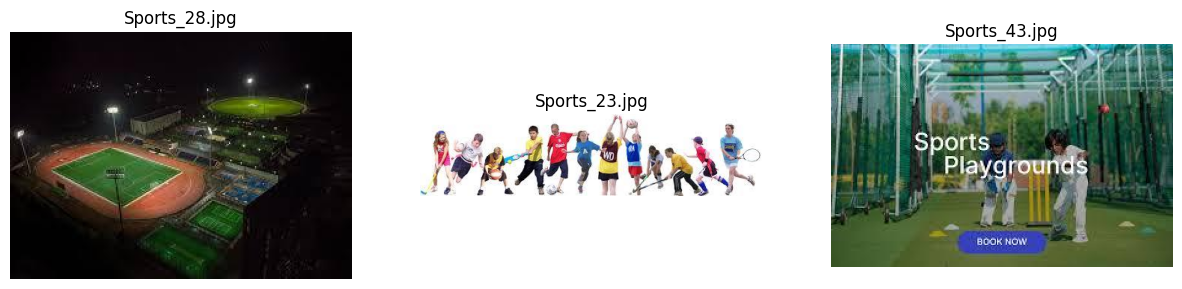


Class: Village


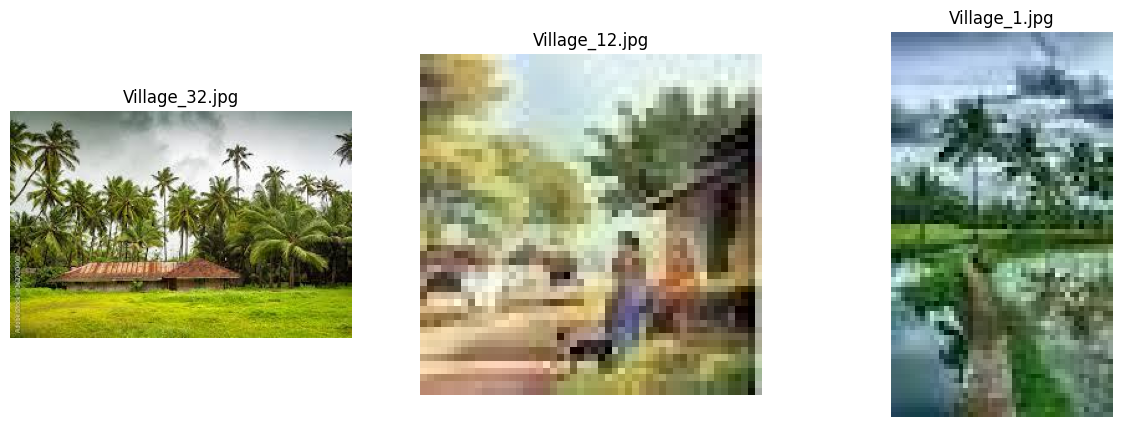


Class: Bottle


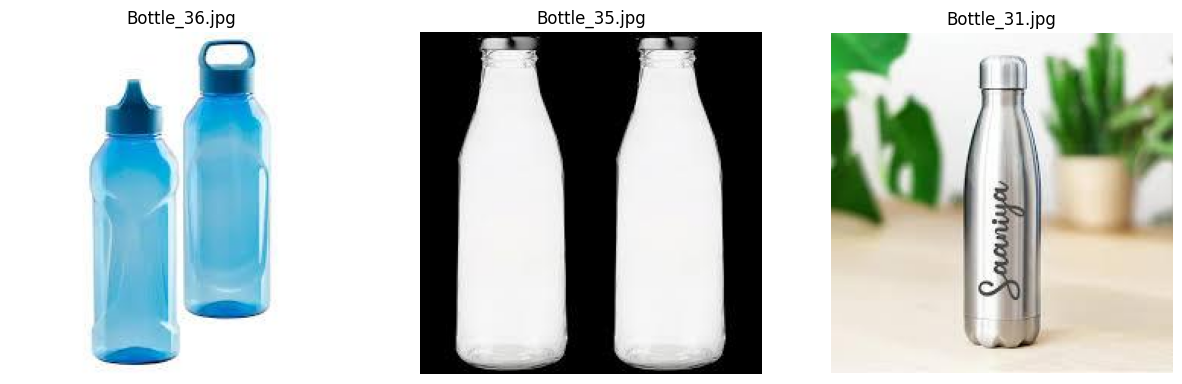


Class: Cat


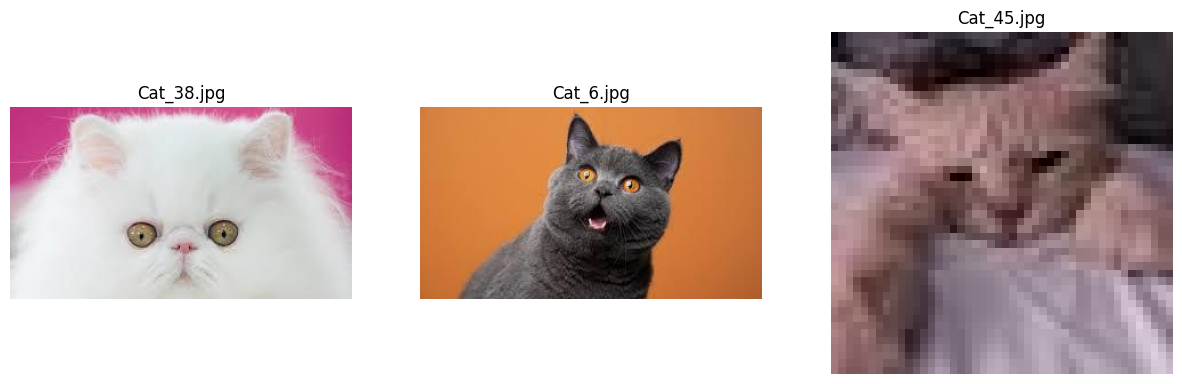


Class: Dog


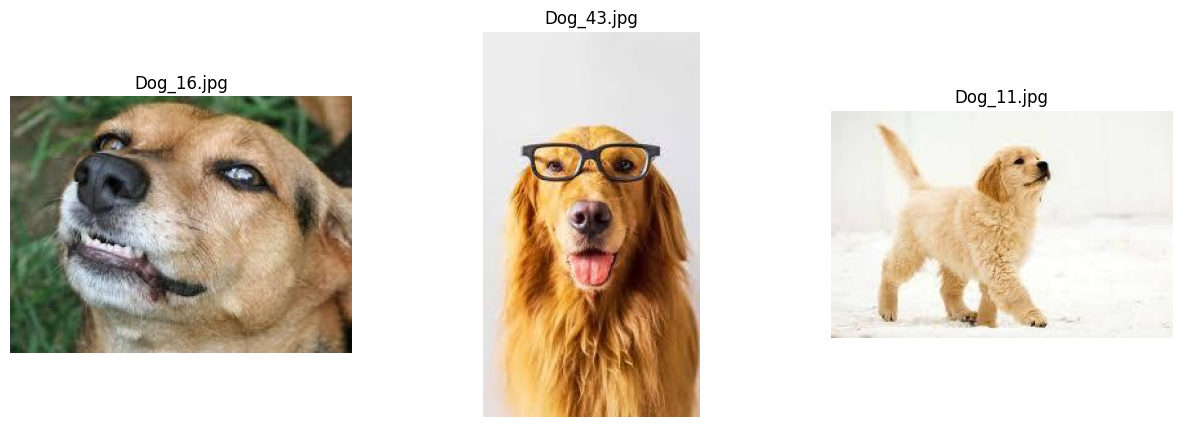


Class: Apple


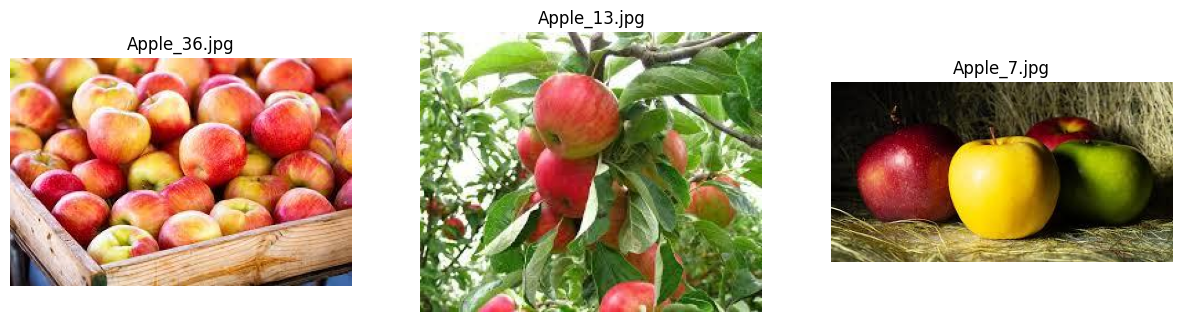


Class: Pencil


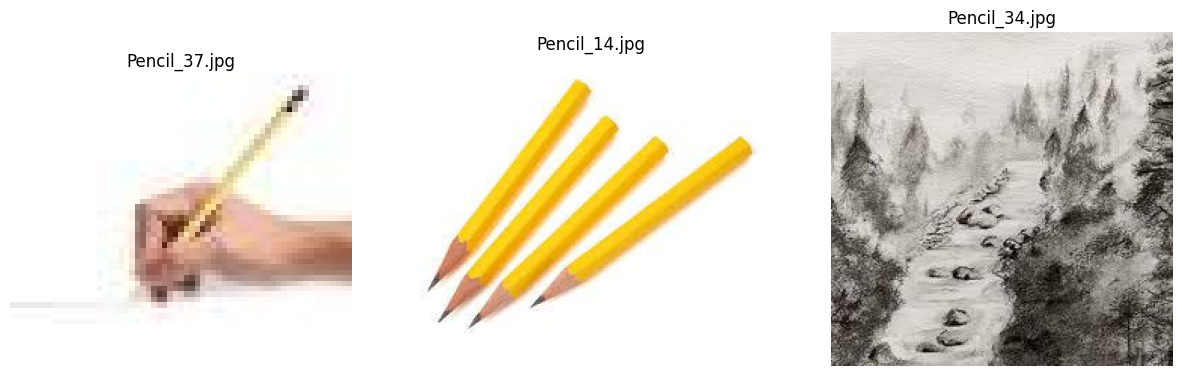


Class: School


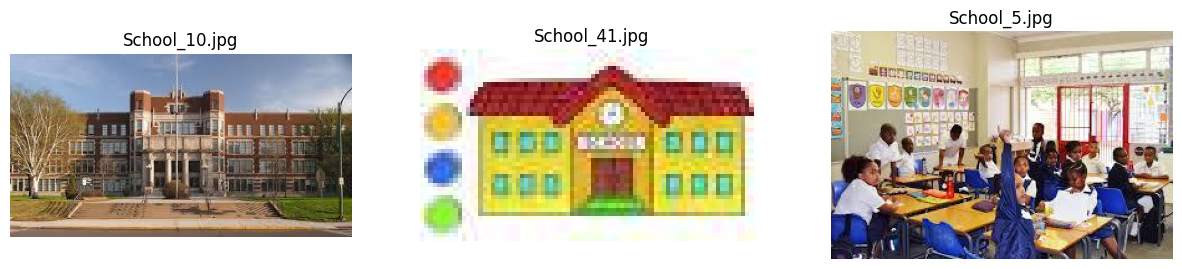


Class: Museum


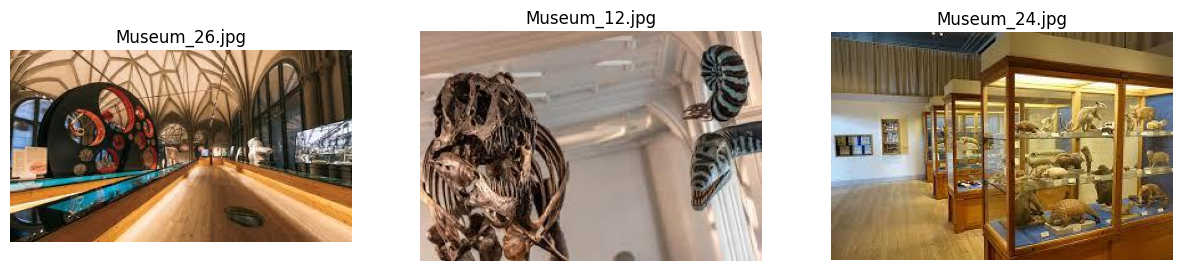


Class: City


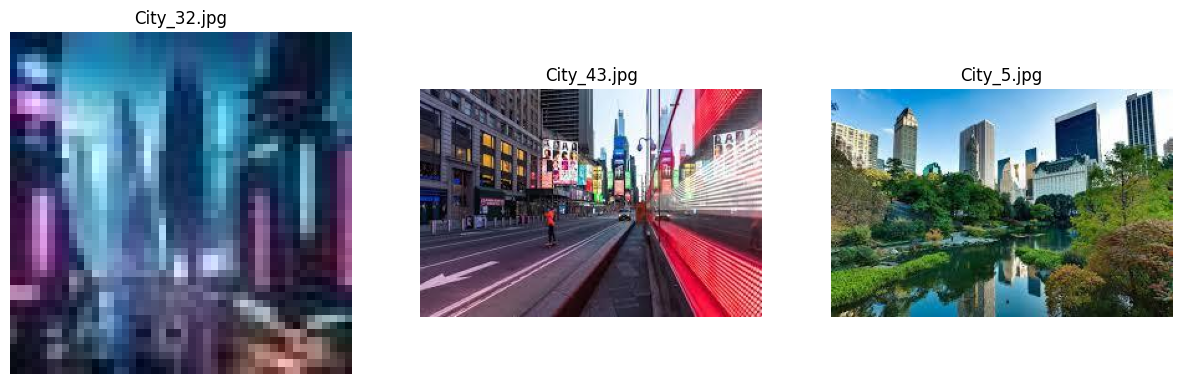


Class: Eraser


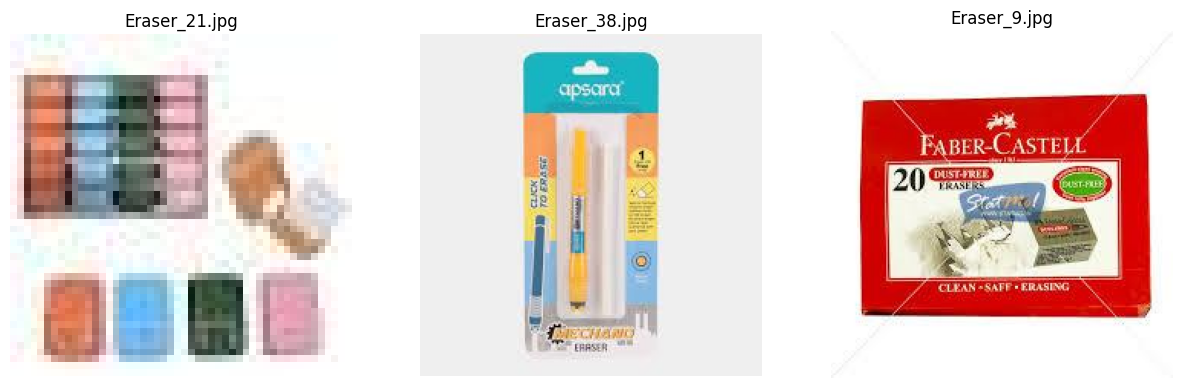


Class: Human


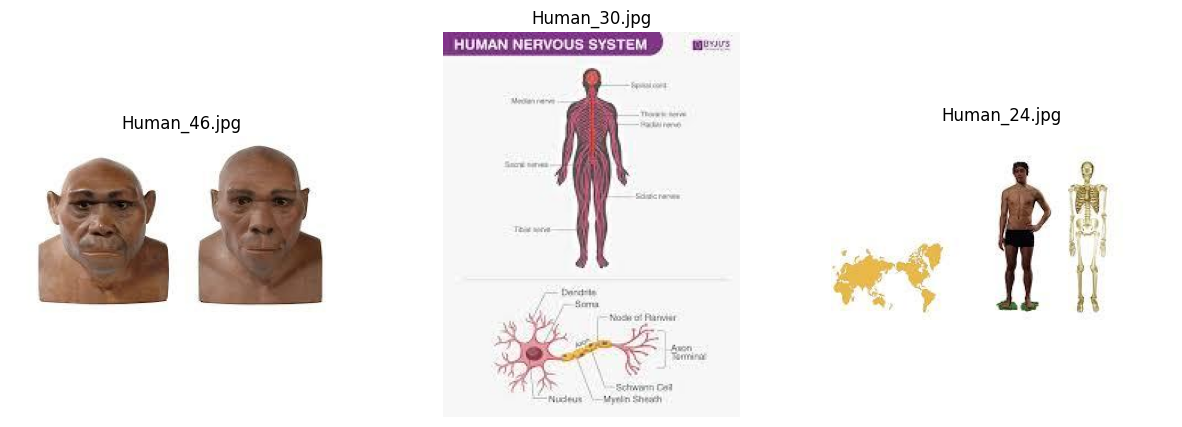


Class: Ocean


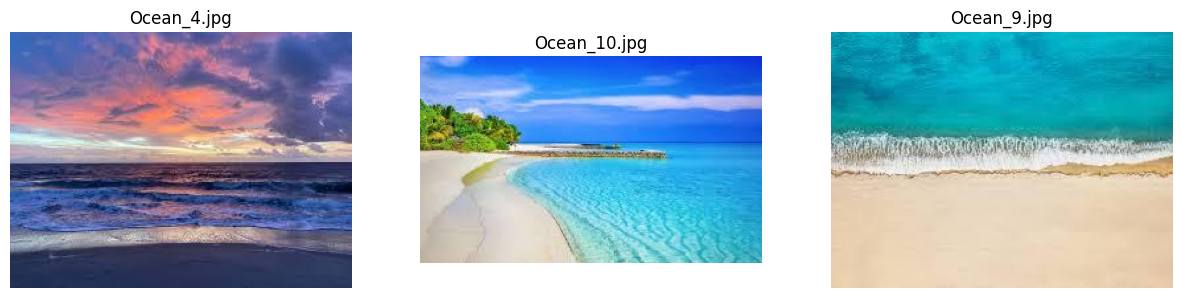


Class: Orange


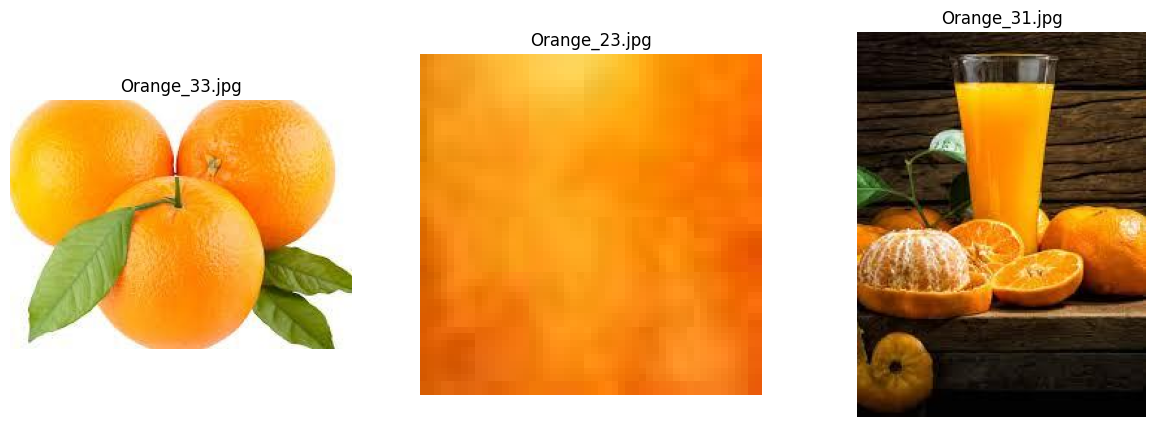


Class: Sky


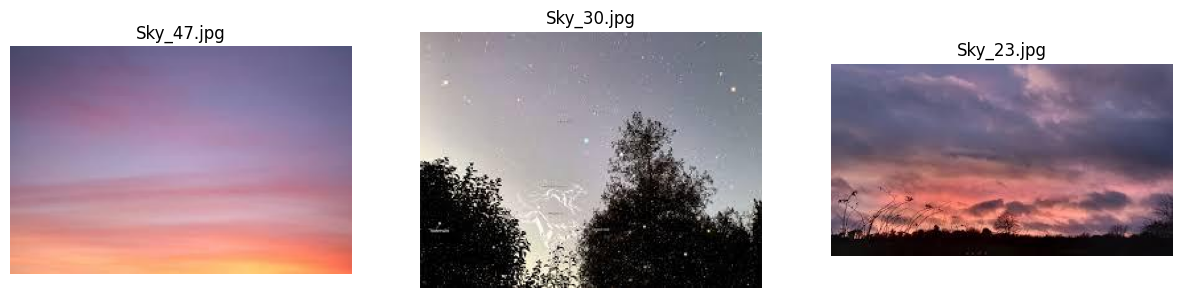

In [11]:


import matplotlib.pyplot as plt
import random

def show_example_images(image_directory, num_images_per_class=3):
    for class_name in os.listdir(image_directory):
        class_dir = os.path.join(image_directory, class_name)
        if os.path.isdir(class_dir):
            image_files = [f for f in os.listdir(class_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
            if image_files:
                print(f"\nClass: {class_name}")
                num_images_to_show = min(num_images_per_class, len(image_files))
                selected_images = random.sample(image_files, num_images_to_show)

                plt.figure(figsize=(15, 5))
                for i, image_file in enumerate(selected_images):
                    image_path = os.path.join(class_dir, image_file)
                    try:
                        img = plt.imread(image_path)
                        plt.subplot(1, num_images_to_show, i + 1)
                        plt.imshow(img)
                        plt.title(image_file)
                        plt.axis('off')
                    except Exception as e:
                        print(f"Error displaying image {image_path}: {e}")
                plt.show()


show_example_images(image_dir)


In [12]:
if 'Apple' in image_size_data:
  print("Image sizes for Apple class:")
  for size in image_size_data['Apple']:
      print(size)
else:
    print("Apple class folder not found.")

Image sizes for Apple class:
(194, 259)
(300, 168)
(16, 16)
(275, 183)
(50, 50)
(16, 16)
(223, 226)
(310, 163)
(67, 46)
(300, 168)
(283, 178)
(50, 50)
(251, 201)
(310, 163)
(401, 126)
(275, 183)
(248, 203)
(277, 182)
(275, 183)
(50, 50)
(275, 183)
(82, 46)
(259, 194)
(285, 177)
(225, 225)
(225, 225)
(290, 174)
(286, 176)
(300, 168)
(300, 168)


In [13]:
widths = []
heights = []
for class_name, sizes in image_size_data.items():
    for width, height in sizes:
        widths.append(width)
        heights.append(height)

## Distribution of Image widths and heights

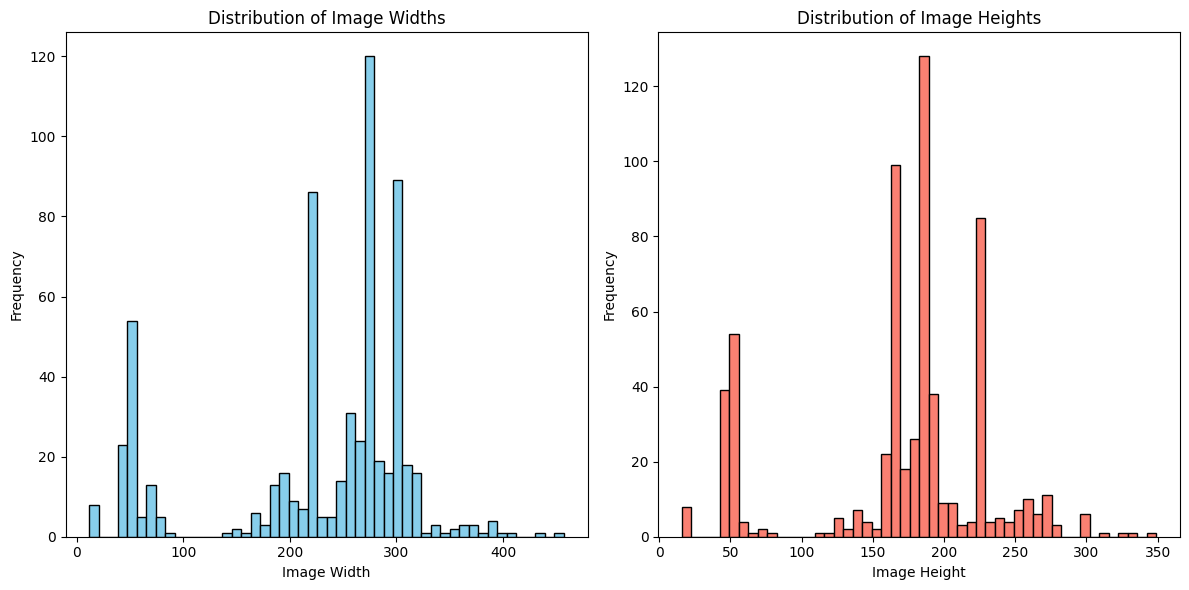

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Image Width")
plt.ylabel("Frequency")
plt.title("Distribution of Image Widths")

plt.subplot(1, 2, 2)
plt.hist(heights, bins=50, color='salmon', edgecolor='black')
plt.xlabel("Image Height")
plt.ylabel("Frequency")
plt.title("Distribution of Image Heights")
plt.tight_layout()
plt.show()


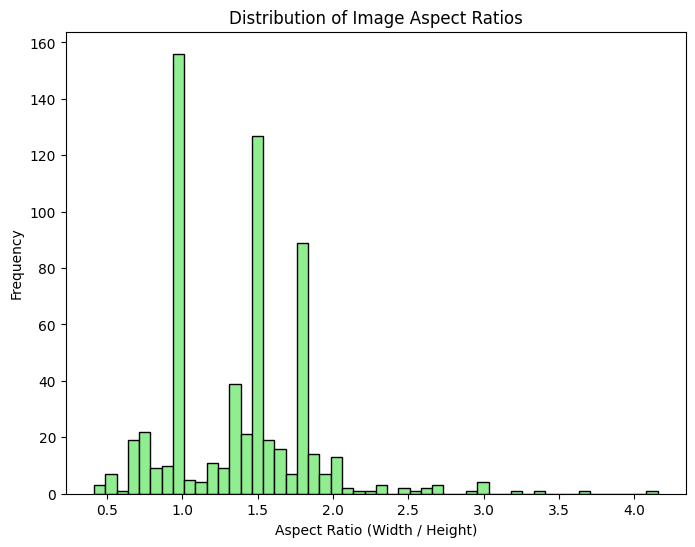

In [15]:
aspect_ratios = [w / h for w, h in zip(widths, heights)]
plt.figure(figsize=(8, 6))
plt.hist(aspect_ratios, bins=50, color='lightgreen', edgecolor='black')
plt.xlabel("Aspect Ratio (Width / Height)")
plt.ylabel("Frequency")
plt.title("Distribution of Image Aspect Ratios")
plt.show()

## Image size scatter plot

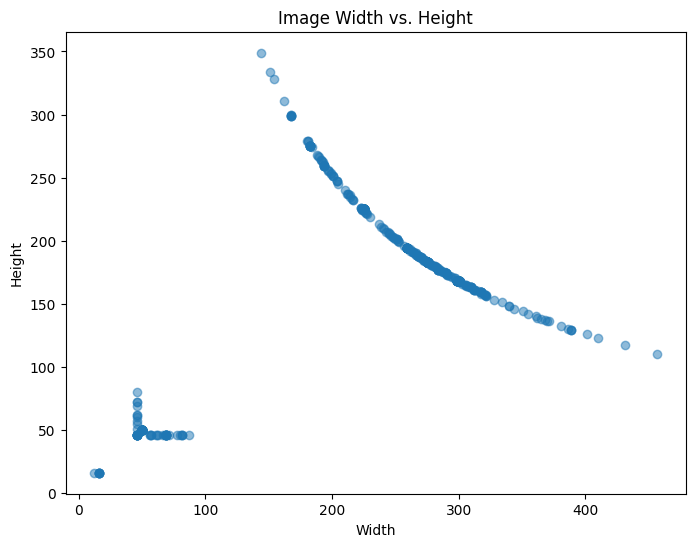

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(widths, heights, alpha=0.5)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Width vs. Height")
plt.show()

## Image sizes for different classes


<ipython-input-17-d4c90642cf05>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sizes_list, labels=class_names, patch_artist=True)


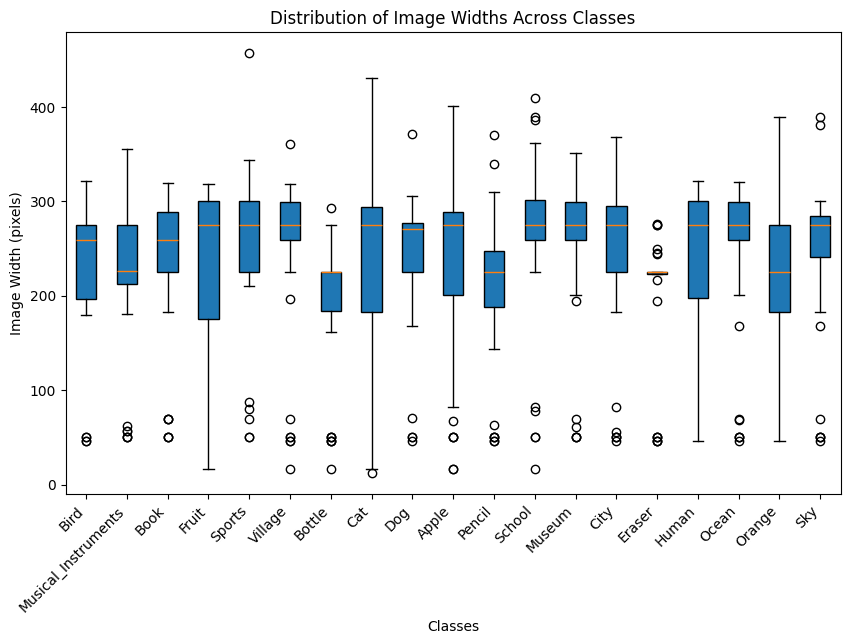

In [17]:
if len(image_size_data) > 1:
  class_names = list(image_size_data.keys())
  sizes_list = []
  for class_name in class_names:
      sizes_list.append([size[0] for size in image_size_data[class_name]])
  plt.figure(figsize=(10, 6))
  plt.boxplot(sizes_list, labels=class_names, patch_artist=True)
  plt.title('Distribution of Image Widths Across Classes')
  plt.xlabel('Classes')
  plt.ylabel('Image Width (pixels)')
  plt.xticks(rotation=45, ha='right')
  plt.show()

# Training a model for classification

## Using the ResNet18 model and fine-tuning the last layer

Skipping corrupted image: /content/images/Bird/Bird_28.jpg
Skipping corrupted image: /content/images/Bird/Bird_12.jpg
Skipping corrupted image: /content/images/Bird/Bird_8.jpg
Skipping corrupted image: /content/images/Bird/Bird_22.jpg
Skipping corrupted image: /content/images/Bird/Bird_21.jpg
Skipping corrupted image: /content/images/Bird/Bird_30.jpg
Skipping corrupted image: /content/images/Bird/Bird_16.jpg
Skipping corrupted image: /content/images/Bird/Bird_46.jpg
Epoch 1/10, Loss: 2.1256
Epoch 2/10, Loss: 1.1310
Epoch 3/10, Loss: 0.7021
Epoch 4/10, Loss: 0.4448
Epoch 5/10, Loss: 0.3515
Epoch 6/10, Loss: 0.3013
Epoch 7/10, Loss: 0.1983
Epoch 8/10, Loss: 0.1481
Epoch 9/10, Loss: 0.2424
Epoch 10/10, Loss: 0.1678


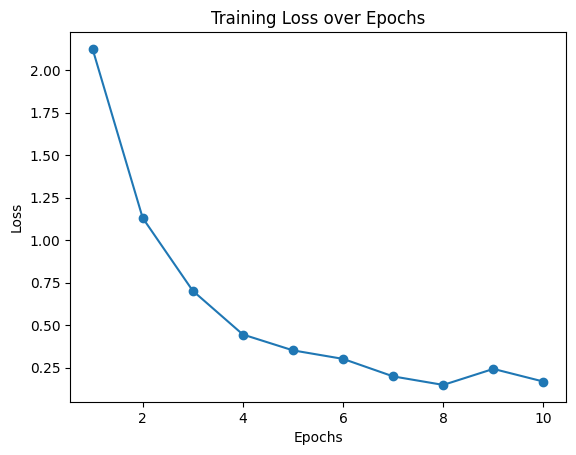

Training complete!


In [20]:
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms, models
from PIL import Image
import os
import matplotlib.pyplot as plt

DATA_DIR = '/content/images'
BATCH_SIZE = 32
EPOCHS = 10
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

class CustomImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.classes = sorted(os.listdir(root_dir))

        for label, class_name in enumerate(self.classes):
            class_path = os.path.join(root_dir, class_name)
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                try:
                    with Image.open(img_path) as img:
                        img.verify()
                    self.image_paths.append(img_path)
                    self.labels.append(label)
                except (IOError, SyntaxError):
                    print(f"Skipping corrupted image: {img_path}")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        label = self.labels[idx]
        return image, label

dataset = CustomImageDataset(DATA_DIR, transform=transform)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

model = models.resnet18(pretrained=True)
model.fc = torch.nn.Linear(model.fc.in_features, len(dataset.classes))
model.to(DEVICE)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_losses = []
for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    for images, labels in dataloader:
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(dataloader)
    train_losses.append(epoch_loss)
    print(f'Epoch {epoch + 1}/{EPOCHS}, Loss: {epoch_loss:.4f}')

plt.plot(range(1, EPOCHS + 1), train_losses, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

print("Training complete!")